<a href="https://colab.research.google.com/github/Harallambos/AI/blob/main/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION MODEL FOR CYBER THREAD DETECTION **


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.externals import joblib
data = pd.read_csv('train_imperson_without4n7_balanced_data.csv')

In [ ]:
data

,0,0.1,0.2,6.57E-05,6.57E-05.1,0.0091503,0.0091503.1,0.3,0.4,0.5,0.6,1,1.1,1.2,1.3,1.4,0.7,1.5,0.8,0.9,0.10,0.11,0.12,1.6,0.13,0.14,1.7,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.36865,0.23,0.24,0.25,0.26,...,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.5.2,1.15,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117
0,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36880,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.005099,0.005099,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36890,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97038,0,0,0,0.035953,0.035953,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93345,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97039,0,0,0,0.018075,0.018075,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93348,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97040,0,0,0,0.041889,0.041889,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93350,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97041,0,0,0,0.004191,0.004191,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93352,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1


In [ ]:
data.shape

(97043, 153)

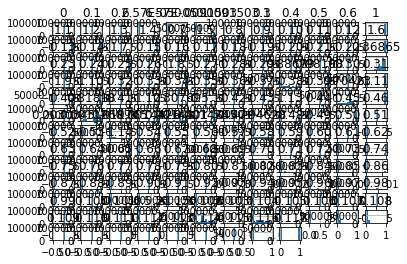

In [ ]:
data.hist()
plt.show()

In [ ]:
#We print the first 20 rows of the data set.
data.head(20)

,0,0.1,0.2,6.57E-05,6.57E-05.1,0.0091503,0.0091503.1,0.3,0.4,0.5,0.6,1,1.1,1.2,1.3,1.4,0.7,1.5,0.8,0.9,0.10,0.11,0.12,1.6,0.13,0.14,1.7,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.36865,0.23,0.24,0.25,0.26,...,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.5.2,1.15,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117
0,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36880,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.005099,0.005099,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36890,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
5,0,0,0,0.020133,0.020133,0.073203,0.073203,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36898,0,0,0,0,...,0,0.0,1,0.002334,0.53846,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
6,0,0,0,0.140800,0.140800,0.144440,0.144440,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36904,0,0,0,0,...,0,0.0,1,0.000292,0.46154,0.000000,0.003968,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
7,0,0,0,0.004916,0.004916,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36905,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
8,0,0,0,0.034137,0.034137,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36905,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
9,0,0,0,0.033583,0.033583,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36912,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0


In [ ]:
types = data.dtypes
print(types)

0               int64
0.1             int64
0.2             int64
6.57E-05      float64
6.57E-05.1    float64
               ...   
0.113           int64
0.114           int64
0.115           int64
0.116         float64
0.117           int64
Length: 153, dtype: object


In [ ]:
description = data.describe()
print(description)

             0      0.1      0.2  ...    0.115         0.116         0.117
count  97043.0  97043.0  97043.0  ...  97043.0  97043.000000  97043.000000
mean       0.0      0.0      0.0  ...      0.0      0.178476      0.500005
std        0.0      0.0      0.0  ...      0.0      0.360080      0.500003
min        0.0      0.0      0.0  ...      0.0      0.000000      0.000000
25%        0.0      0.0      0.0  ...      0.0      0.000000      0.000000
50%        0.0      0.0      0.0  ...      0.0      0.023873      1.000000
75%        0.0      0.0      0.0  ...      0.0      0.023873      1.000000
max        0.0      0.0      0.0  ...      0.0      1.000000      1.000000

[8 rows x 153 columns]


In [ ]:
#We made a list with all the names of the variables of our dataset. Each column coresponds to the name of the variable in the list. 
variable_names = ['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.len', 'frame.cap_len', 'frame.marked', 'frame.ignored', 
         'radiotap.version', 'radiotap.pad', 'radiotap.length', 
         'radiotap.present.tsft', 'radiotap.present.flags', 'radiotap.present.rate', 'radiotap.present.channel', 'radiotap.present.fhss', 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.antenna', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.rxflags', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.reserved', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 
         'radiotap.mactime', 
         'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 'radiotap.flags.fcs', 'radiotap.flags.datapad', 'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 
         'radiotap.datarate', 
         'radiotap.channel.freq', 'radiotap.channel.type.turbo', 'radiotap.channel.type.cck', 'radiotap.channel.type.ofdm', 'radiotap.channel.type.2ghz', 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive', 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm', 'radiotap.channel.type.sturbo', 'radiotap.channel.type.half', 'radiotap.channel.type.quarter', 
         'radiotap.dbm_antsignal', 'radiotap.antenna', 'radiotap.rxflags.badplcp', 
         'wlan.fc.type_subtype', 'wlan.fc.version', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.order', 
         'wlan.duration', 'wlan.ra', 'wlan.da', 'wlan.ta', 'wlan.sa', 'wlan.bssid', 'wlan.frag', 'wlan.seq', 'wlan.bar.type', 'wlan.ba.control.ackpolicy', 'wlan.ba.control.multitid', 'wlan.ba.control.cbitmap', 'wlan.bar.compressed.tidinfo', 'wlan.ba.bm', 'wlan.fcs_good', 
         'wlan_mgt.fixed.capabilities.ess', 'wlan_mgt.fixed.capabilities.ibss', 'wlan_mgt.fixed.capabilities.cfpoll.ap', 'wlan_mgt.fixed.capabilities.privacy', 'wlan_mgt.fixed.capabilities.preamble', 'wlan_mgt.fixed.capabilities.pbcc', 'wlan_mgt.fixed.capabilities.agility', 'wlan_mgt.fixed.capabilities.spec_man', 'wlan_mgt.fixed.capabilities.short_slot_time', 'wlan_mgt.fixed.capabilities.apsd', 'wlan_mgt.fixed.capabilities.radio_measurement', 'wlan_mgt.fixed.capabilities.dsss_ofdm', 'wlan_mgt.fixed.capabilities.del_blk_ack', 'wlan_mgt.fixed.capabilities.imm_blk_ack', 'wlan_mgt.fixed.listen_ival', 'wlan_mgt.fixed.current_ap', 'wlan_mgt.fixed.status_code', 'wlan_mgt.fixed.timestamp', 'wlan_mgt.fixed.beacon', 'wlan_mgt.fixed.aid', 'wlan_mgt.fixed.reason_code', 'wlan_mgt.fixed.auth.alg', 'wlan_mgt.fixed.auth_seq', 'wlan_mgt.fixed.category_code', 'wlan_mgt.fixed.htact', 'wlan_mgt.fixed.chanwidth', 'wlan_mgt.fixed.fragment', 'wlan_mgt.fixed.sequence', 'wlan_mgt.tagged.all', 'wlan_mgt.ssid', 'wlan_mgt.ds.current_channel', 'wlan_mgt.tim.dtim_count', 'wlan_mgt.tim.dtim_period', 'wlan_mgt.tim.bmapctl.multicast', 'wlan_mgt.tim.bmapctl.offset', 'wlan_mgt.country_info.environment', 'wlan_mgt.rsn.version', 'wlan_mgt.rsn.gcs.type', 'wlan_mgt.rsn.pcs.count', 'wlan_mgt.rsn.akms.count', 'wlan_mgt.rsn.akms.type', 'wlan_mgt.rsn.capabilities.preauth', 'wlan_mgt.rsn.capabilities.no_pairwise', 'wlan_mgt.rsn.capabilities.ptksa_replay_counter', 'wlan_mgt.rsn.capabilities.gtksa_replay_counter', 'wlan_mgt.rsn.capabilities.mfpr', 'wlan_mgt.rsn.capabilities.mfpc', 'wlan_mgt.rsn.capabilities.peerkey', 'wlan_mgt.tcprep.trsmt_pow', 'wlan_mgt.tcprep.link_mrg', 
         'wlan.wep.iv', 'wlan.wep.key', 'wlan.wep.icv', 'wlan.tkip.extiv', 'wlan.ccmp.extiv', 'wlan.qos.tid', 'wlan.qos.priority', 'wlan.qos.eosp', 'wlan.qos.ack', 'wlan.qos.amsdupresent', 'wlan.qos.buf_state_indicated', 'wlan.qos.bit4', 'wlan.qos.txop_dur_req', 'wlan.qos.buf_state_indicated2', 
         'data.len', 'class']
print(len(variable_names))

153


In [ ]:
#We are checking the class distribution
# Class Distribution
data = pd.read_csv('train_imperson_without4n7_balanced_data.csv', names=variable_names)
class_counts = data.groupby('class').size()
print(class_counts)

class
0    48522
1    48522
dtype: int64


In [ ]:
# Pairwise Pearson correlations. We check the correlations between attributes.
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

                               frame.interface_id  frame.dlt  ...  data.len  class
frame.interface_id                            NaN        NaN  ...       NaN    NaN
frame.dlt                                     NaN        NaN  ...       NaN    NaN
frame.offset_shift                            NaN        NaN  ...       NaN    NaN
frame.time_delta                              NaN        NaN  ...    -0.097  0.058
frame.time_delta_displayed                    NaN        NaN  ...    -0.097  0.058
...                                           ...        ...  ...       ...    ...
wlan.qos.bit4                                 NaN        NaN  ...       NaN    NaN
wlan.qos.txop_dur_req                         NaN        NaN  ...       NaN    NaN
wlan.qos.buf_state_indicated2                 NaN        NaN  ...       NaN    NaN
data.len                                      NaN        NaN  ...     1.000 -0.435
class                                         NaN        NaN  ...    -0.435  1.000

[15

In [ ]:
# Skew for each attribute
skew = data.skew()
print(skew)

frame.interface_id                0.000
frame.dlt                         0.000
frame.offset_shift                0.000
frame.time_delta                 17.200
frame.time_delta_displayed       17.200
                                  ...  
wlan.qos.bit4                     0.000
wlan.qos.txop_dur_req             0.000
wlan.qos.buf_state_indicated2     0.000
data.len                          1.784
class                             0.000
Length: 153, dtype: float64


In [ ]:
#WE PRINT ALL THE UNIQUE VALUES OF THE DATASET. THE UNIKE VALUES WILL APEAR WITH 1. This shows how many values each attribute has. So every attribute that has a value of 1 means that is a uniqua attribute and we need to removeit from our dataset because it is 
data = pd.read_csv('train_imperson_without4n7_balanced_data.csv', names=variable_names)
#data.hist()
#plt.show()
print(data.nunique())

frame.interface_id                  1
frame.dlt                           1
frame.offset_shift                  1
frame.time_delta                 8718
frame.time_delta_displayed       8718
                                 ... 
wlan.qos.bit4                       1
wlan.qos.txop_dur_req               1
wlan.qos.buf_state_indicated2       1
data.len                          333
class                               2
Length: 153, dtype: int64


In [ ]:
# Colab includes an extension that renders pandas dataframes into interactive tables that can be filtered, sorted, and explored dynamically. Enable this extension with %load_ext google.colab.data_table and disable it with %unload_ext google.colab.data_table
%load_ext google.colab.data_table

In [ ]:
#Checking if it is using GPU instead of CPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# MOUNT YOUR GOOGLE DRIVE TO COLAB
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#With this command you can download files from colab...... The .ipynb files can be edited with Jupyter 
from google.colab import files
files.download('/content/gdrive/MyDrive/Colab Notebooks/CORSEWORK/Coursework.ipynb')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>